In [1]:
# all standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# loading data
train_data = pd.read_csv('emnist-balanced-train.csv', header = None)
test_data = pd.read_csv('emnist-balanced-test.csv')
print(train_data.shape)
print(test_data.shape)

(112800, 785)
(18799, 785)


In [3]:
# print(train_data.shape)
# print(test_data.shape)
# train_data.head
train_data.head()
# train_data.columns

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train_data[0].unique())
# train_data['45'].value_counts()

[45 36 43 15  4 42 26 32 20  1 46 13 24 12  5 17  3 40 14 44 19 29 25 35
 28 23 22 34  9 30 38 39 37 31 16  7  2  8 10  6 27 33 11 18 41  0 21]


In [5]:
# update column names for both datasets
columns = ['labels']
for i in range(train_data.shape[1]-1):
    columns.append(i)
    
train_data.columns = columns
test_data.columns = columns

train_data.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
type(train_data['labels'].iloc[0])

numpy.int64

In [7]:
df = train_data.drop_duplicates('labels')
df.head()
df.shape

(47, 785)

In [8]:
X_train = train_data.loc[:, 0:]
y_train = train_data.loc[:, 'labels']
df_x = df.loc[:, 0:]
df_y = df.loc[:, 'labels']

In [9]:
# creating the mapping
label_map = pd.read_csv("mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

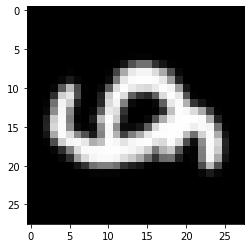

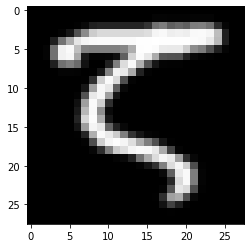

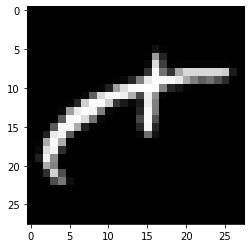

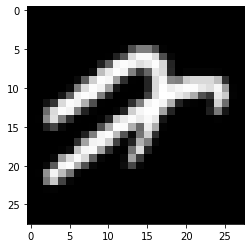

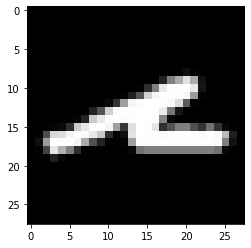

In [10]:
# sample_label = y_train.iloc[42]
s = { i for i in range(1,6)}
for i in s:
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap=plt.cm.gray)
    plt.show()

### The figures appear to be flipped and rotated

In [11]:
def reshape_and_rotate(img):
    img = img.reshape(28, 28)
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

a


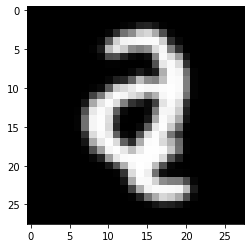

n


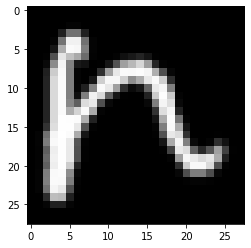

F


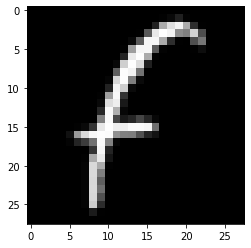

4


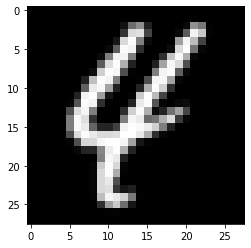

h


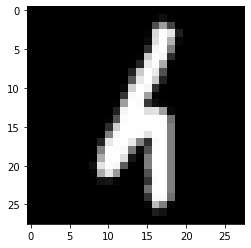

In [12]:
for i in s:
    print(label_dictionary[df_y.iloc[i]])
    plt.imshow(reshape_and_rotate(X_train.iloc[i].values), cmap=plt.cm.gray)
    plt.show()

### We need to apply the above transformation for all the images

In [13]:
X_train_reshaped = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
# X_train_reshaped.shape
X_train_reshaped = X_train_reshaped / 255

X_train_flattened = X_train_reshaped.reshape(len(X_train), 28*28)

## Fitting the logistic regression model

In [14]:
lr = LogisticRegression(solver = 'lbfgs', multi_class= 'multinomial',max_iter=1000)

In [ ]:
lr.fit(X_train_flattened, y_train)